Create a histogram of 1D data

In [15]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt


def bucketize(point: float, bucket_size: float) -> float:
    #Floor the point to the next lower multiple of bucket size
    return bucket_size*math.floor(point/bucket_size)

def make_histogram(points:List[float], bucket_size: float) -> Dict[float,int]:
    #Buckets the points and counts how many in each bucket
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram (points:List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
    plt.title(title)

In [16]:
# Data
import random
from Probability import inverse_normal_cdf

Histogram plotting with data of different distributions

In [17]:
random.seed(0)

# Data 1
#uniform between -100 and 100
uniform = [200*random.random() -100 for _ in range(10000)]

#Data 2
#normal distrinution with mean 0, standard deviation 57
normal = [57*inverse_normal_cdf(random.random())
         for _ in range(10000)]

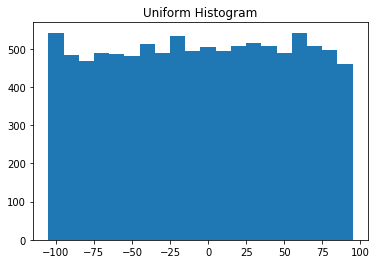

In [18]:
# Plot Data 1
plot_histogram(uniform, 10, "Uniform Histogram")

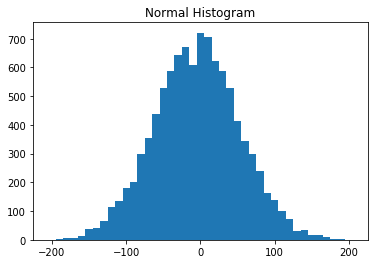

In [19]:
# Plot Data 2
plot_histogram(normal, 10, "Normal Histogram")

2 Dimensional data

In [20]:
def random_normal() -> float:
    # Returns a random draw from a standard normal distribution
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x+random_normal()/2 for x in xs]
ys2 = [-x+random_normal()/2 for x in xs]

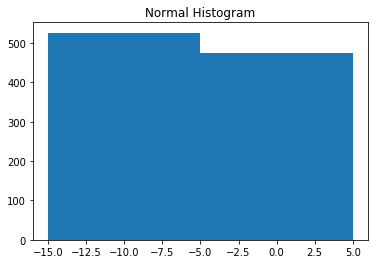

In [21]:
# Plot Data 1
plot_histogram(ys1, 10, "Normal Histogram")

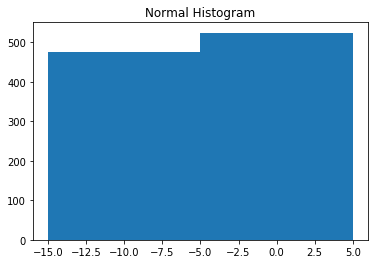

In [22]:
# Plot Data 2
plot_histogram(ys2, 10, "Normal Histogram")

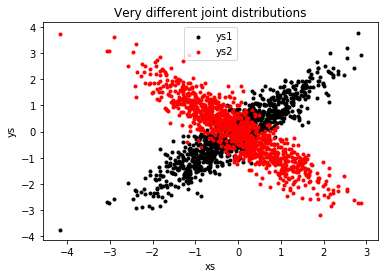

In [23]:
plt.scatter(xs,ys1, marker = '.', color = 'black', label ='ys1')
plt.scatter(xs,ys2, marker = '.', color = 'red', label ='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc = 9)
plt.title('Very different joint distributions')
plt.show()


In [24]:
# Difference between ys1 and ys2 would be apparent through correlations
from Statistics import correlation
print(correlation(xs,ys1)) # about 0.9
print(correlation(xs,ys2)) # about -0.9

0.9010493686379609
-0.8920981526880033


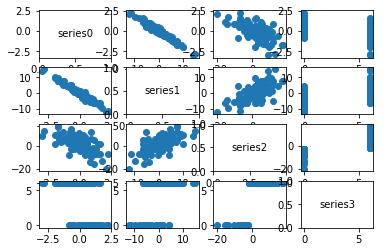

In [25]:
# corr_data is a list of four 100-d vectors
# corr_data = [[random.random() for _ in range(100)] for _ in range(4)]
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

num_vectors = len(corr_data)

fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):
        # Scatter column_j on the x-axis vs. column on the y-axis
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])
        # Unless i == j, in which case show the series name
        else: ax[i][j].annotate("series" + str(i), (0.5,0.5),
                               xycoords = 'axes fraction',
                               ha = "center", va = "center")
            
# Fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

In [26]:
#Create dictionary
import datetime
stock_price = {'closing_price': 102.06,
               'date':datetime.date(2014,8,29),
               'symbol':'AAPL'}
stock_price

{'closing_price': 102.06, 'date': datetime.date(2014, 8, 29), 'symbol': 'AAPL'}

In [27]:
# To avoid confusions and typos, use namedtuple
from collections import namedtuple

StockPrice = namedtuple('StockPrice', ['symbol','date','closing_price']) 
price = StockPrice('MSFT',datetime.date(2018,12,14), 106.03)
price

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [28]:
# Immutable
assert price.symbol == 'MSFT'
assert price.closing_price == 10000
price

AssertionError: 

In [29]:
# Dataclasses are a mutable version of NamedTuple
from typing import NamedTuple
class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float
        
    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT','GOOG','FB','AMZN','AAPL']
    
price = StockPrice('MSFT', datetime.date(2018,12, 14), 106.3)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.3
assert price.is_high_tech()

In [30]:
price

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.3)

In [31]:
from dateutil.parser import parse

def parse_row(row:List[str])-> StockPrice:
    symbol,date,closing_price = row
    return StockPrice(symbol = symbol,
                      date = parse(date).date(),
                      closing_price = float(closing_price))

In [32]:
#Now test the function
stock = parse_row(['MSFT',"2018-12-14", "106.03"])

In [33]:
# If there's a bad data. For example: a float value that doesn't actually represent a number.
# It may return None and crash the program

from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)



In [34]:
assert try_parse_row(['MSFT0',"2018-12-14", "106.03"]) is None
assert try_parse_row(['MSFT',"2018-12--14", "106.03"]) is None
assert try_parse_row(['MSFT',"2018-12-14", "x"]) is None

In [35]:
from dateutil.parser import parse
import csv

with open("stocks.csv", "r") as f:
    reader = csv.DictReader(f)
    rows = [[row['symbol'], row['date'], row['price']]
            for row in reader]

# skip header
maybe_data = [try_parse_row(row) for row in rows]

# Make sure they all loaded successfully:
assert maybe_data
assert all(sp is not None for sp in maybe_data)

# This is just to make mypy happy
data = [sp for sp in maybe_data if sp is not None]
data

[StockPrice(symbol='MSFT', date=datetime.date(2000, 1, 1), closing_price=39.81),
 StockPrice(symbol='MSFT', date=datetime.date(2000, 2, 1), closing_price=36.35),
 StockPrice(symbol='MSFT', date=datetime.date(2000, 3, 1), closing_price=43.22),
 StockPrice(symbol='MSFT', date=datetime.date(2000, 4, 1), closing_price=28.37),
 StockPrice(symbol='MSFT', date=datetime.date(2000, 5, 1), closing_price=25.45),
.......... StockPrice(symbol='AAPL', date=datetime.date(2010, 3, 1), closing_price=223.02)]

In [36]:
max_aapl_price = max(stock_price.closing_price 
                     for stock_price in data 
                     if stock_price.symbol == 'AAPL')
print(max_aapl_price)


223.02


In [37]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))
    
for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price
max_prices

defaultdict(<function __main__.<lambda>()>,
            {'MSFT': 43.22,
             'AMZN': 135.91,
             'IBM': 130.32,
             'GOOG': 707.0,
             'AAPL': 223.02})

In [38]:
from typing import List
prices: Dict[str, List[float]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)
# order (or sort) the prices by date
prices = {symbol: sorted(symbol_prices) 
          for symbol, symbol_prices in prices.items()}
print(prices)

{'MSFT': [StockPrice(symbol='MSFT', date=datetime.date(2000, 1, 1), closing_price=39.81), StockPrice(symbol='MSFT', date=datetime.date(2000, 2, 1), closing_price=36.35), StockPrice(symbol='MSFT', date=datetime.date(2000, 3, 1), closing_price=43.22), StockPrice(symbol='MSFT', date=datetime.date(2000, 4, 1), closing_price=28.37), StockPrice(symbol='MSFT', date=datetime.date(2000, 5, 1), closing_price=25.45), StockPrice(symbol='MSFT', date=datetime.date(2000, 6, 1), closing_price=32.54), StockPrice(symbol='MSFT', date=datetime.date(2000, 7, 1), closing_price=28.4), StockPrice(symbol='MSFT', date=datetime.date(2000, 8, 1), closing_price=28.4), StockPrice(symbol='MSFT', date=datetime.date(2000, 9, 1), closing_price=24.53), StockPrice(symbol='MSFT', date=datetime.date(2000, 10, 1), closing_price=28.02), StockPrice(symbol='MSFT', date=datetime.date(2000, 11, 1), closing_price=23.34), StockPrice(symbol='MSFT', date=datetime.date(2000, 12, 1), closing_price=17.65), StockPrice(symbol='MSFT', dat

In [40]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1,13)}
changes_by_month

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: []}

In [41]:
for change in all_changes:
    changes_by_month[change.date.month].append(change)
changes_by_month

{1: [DailyChange(symbol='MSFT', date=datetime.date(2001, 1, 1), pct_change=0.40736543909348444),
  DailyChange(symbol='MSFT', date=datetime.date(2002, 1, 1), pct_change=-0.03821892393320958),
  DailyChange(symbol='MSFT', date=datetime.date(2003, 1, 1), pct_change=-0.08178792201616747),
  DailyChange(symbol='MSFT', date=datetime.date(2004, 1, 1), pct_change=0.010240427426536192),
  DailyChange(symbol='MSFT', date=datetime.date(2005, 1, 1), pct_change=-0.01672104404567698),
..........  DailyChange(symbol='AAPL', date=datetime.date(2009, 12, 1), pct_change=0.05412435596018206)]}

In [42]:
avg_daily_change = {month: sum(change.pct_change for change in changes)/ len(changes)
                   for month, changes in changes_by_month.items()}

assert avg_daily_change[10] == max(avg_daily_change.values())

In [43]:
# When data is not of same scale then we may need to rescale the data to have mean 0 and std 1
from typing import Tuple
from Vector_operations_on_data import vector_mean
from Statistics import standard_deviation
Vector = List[float]

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """Returns mean and standard deviation of each feature"""
    dim = len(data[0])
    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
             for i in range(dim)]
    return means, stdevs

[70, 170, 40]
[95, 80, 75, 62]
[5, 7, 9]
[1, 2, 3]
[16, 20]
[2, 4, 6]
[3.0, 4.0]
32
14
3.7416573867739413
27
5.196152422706632


In [44]:
vectors = [[-3, -1, 1],[-1, 0, 1], [1, 1, 1], [2, 4, 5]]
means, stdevs = scale(vectors)
means, stdevs

([-0.25, 1.0, 2.0], [2.217355782608345, 2.160246899469287, 2.0])

In [45]:
def rescale(data:List[Vector]) -> List[Vector]:
    #Rescale the input data
    dim = len(data[0])
    
    means, stdevs = scale(data)
    
    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i]>0:
                v[i] = (v[i] - means[i]/stdevs[i])
                
    return rescaled

In [46]:
means,stdevs = scale(rescale(vectors))
means,stdevs

([-0.13725309579957568, 0.5370899501137243, 1.0],
 [2.217355782608345, 2.160246899469287, 2.0])

In [47]:
#Produce a progress bar
import tqdm

for i in tqdm.tqdm(range(100)):
    #do something slow
    _ = [random.random() for _ in range(100000)]

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 103.37it/s]


In [48]:
from typing import List

def primes_up_to (n: int) -> List[int]:
    primes = [2]
    
    with tqdm.trange(3,n) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
                
            t.set_description(f"{len(primes)} primes")
    return primes

my_primes = primes_up_to(1000)


168 primes: 100%|███████████████████████████████████████████████████████████████████| 997/997 [00:01<00:00, 856.60it/s]


In [49]:
import numpy as np
np.transpose(my_primes)

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
       401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
       479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
       571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
       647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
       739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823,
       827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911,
       919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997])